# Unraveling Insights: Model Interpretability in Chicago Traffic Crashes Data

## Introduction
The Chicago Traffic Crashes dataset provides detailed records of crash events throughout Chicago. In this project, i will build a supervised model that predicts a target (for example, crash severity or the likelihood of a particular crash outcome) and then use model interpretability techniques to understand the contributions of various factors. By applying advanced interpretability tools such as SHAP and LIME, we can translate complex model decisions into actionable insights for stakeholders such as the Chicago Department of Transportation and city planners.

## Context
Traffic crashes pose significant risks to public safety and can incur enormous costs for municipalities. This dataset, sourced from the City of Chicago’s open data portal, contains various features that capture crash conditions, vehicle details, and environmental factors. The rich variety of advanced data types in this dataset makes it an ideal candidate for exploring not just predictive modeling but also advanced model interpretation techniques to shed light on how different features drive model predictions.

## Business Problem
Stakeholders need to understand which factors contribute most significantly to severe traffic crashes so that they can prioritize interventions, enhance road safety measures, and optimize resource allocation. Although a predictive model can forecast outcomes, its true value lies in the interpretability of the model, ensuring that decisions are transparent and evidence-based.

## Objectives
- **Data Exploration and Cleaning:** To Examine the dataset for completeness and consistency, identify missing values, and clean the data.<p>
- **Feature Engineering:** To Create and select relevant features that can improve model performance and interoperability.<p>
- **Model Building:** To Develop a supervised learning model (classification or regression) to predict crash outcomes.<p>
- **Model Interpretability**: To Apply advanced interpretability techniques (e.g., SHAP and LIME) to understand feature contributions.<p>
- **Actionable Insights:** To Provide recommendations based on model interpretation that can guide safety interventions and policy decisions.<p>

## Scope
- **Dataset:** I am going to use the ‘Traffic_Crashes_-_Crashes_20250205.csv’ dataset, that is from 'https://data.cityofchicago.org/Transportation/Traffic-Crashes-Vehicles/68nd-jvt3/data_preview'.<p>
- **Modeling Focus:** While multiple models may be explored, the primary focus will be on applying model interpretability techniques.<p>
- **Stakeholders:** The targeted insights will be finally directed at transportation and safety officials, who are well concerned departments.<p>
- **Limitations:** The project will concentrate on a subset of features that are both relevant and available for modeling, noting any potential data limitations.<p>

# Python Setup and Data Loading

## Importation And Loading Of All Necessary Libraries

In [ ]:
# Importing necessary libraries for data handling, visualization, modeling, and interpretability
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
import lime.lime_tabular
import requests

# For modeling
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression  # example model for classification
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder


# For modeling interpretability
import shap
import lime
import lime.lime_tabular

# Seting plot aesthetics
sns.set(style="whitegrid")
%matplotlib inline


### Data loading And Veiwing/Reading

In [ ]:
# Loading the Chicago Traffic Crashes dataset
data_path = 'Traffic_Crashes_-_Crashes_20250205.csv'
df= pd.read_csv(data_path)

# Displaying the first few rows of the dataset to verify successful loading
df.head()


,CRASH_RECORD_ID,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,6c1659069e9c6285a650e70d6f9b574ed5f64c12888479...,NaN,08/18/2023 12:50:00 PM,15,OTHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,OTHER,...,1.0,0.0,1.0,0.0,12,6,8,NaN,NaN,NaN
1,5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4...,NaN,07/29/2023 02:45:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),...,0.0,0.0,1.0,0.0,14,7,7,41.854120,-87.665902,POINT (-87.665902342962 41.854120262952)
2,61fcb8c1eb522a6469b460e2134df3d15f82e81fd93e9c...,NaN,08/18/2023 05:58:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PEDALCYCLIST,NOT DIVIDED,...,1.0,0.0,1.0,0.0,17,6,8,41.942976,-87.761883,POINT (-87.761883496974 41.942975745006)
3,004cd14d0303a9163aad69a2d7f341b7da2a8572b2ab33...,NaN,11/26/2019 08:38:00 AM,25,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PEDESTRIAN,ONE-WAY,...,0.0,0.0,1.0,0.0,8,3,11,NaN,NaN,NaN
4,a1d5f0ea90897745365a4cbb06cc60329a120d89753fac...,NaN,08/18/2023 10:45:00 AM,20,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,FIXED OBJECT,OTHER,...,0.0,0.0,1.0,0.0,10,6,8,NaN,NaN,NaN


# *Initializing Exploration Of Data Analysis (EDA)*

In [ ]:
# checking for the shape of the dataset
print("Shape For The Dataset Is:")
df.shape

Shape For The Dataset Is:


(915366, 48)

In [ ]:
# checking for columns of the Dataset
columns_list = df.columns.tolist()
print(columns_list)

['CRASH_RECORD_ID', 'CRASH_DATE_EST_I', 'CRASH_DATE', 'POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION', 'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE', 'LANE_CNT', 'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'REPORT_TYPE', 'CRASH_TYPE', 'INTERSECTION_RELATED_I', 'NOT_RIGHT_OF_WAY_I', 'HIT_AND_RUN_I', 'DAMAGE', 'DATE_POLICE_NOTIFIED', 'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO', 'STREET_DIRECTION', 'STREET_NAME', 'BEAT_OF_OCCURRENCE', 'PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 'DOORING_I', 'WORK_ZONE_I', 'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I', 'NUM_UNITS', 'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL', 'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING', 'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION', 'INJURIES_UNKNOWN', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH', 'LATITUDE', 'LONGITUDE', 'LOCATION']


In [ ]:
# Displaying general information about the dataset
print("Dataset Info:")
df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 915366 entries, 0 to 915365
Data columns (total 48 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH_RECORD_ID                915366 non-null  object 
 1   CRASH_DATE_EST_I               67444 non-null   object 
 2   CRASH_DATE                     915366 non-null  object 
 3   POSTED_SPEED_LIMIT             915366 non-null  int64  
 4   TRAFFIC_CONTROL_DEVICE         915366 non-null  object 
 5   DEVICE_CONDITION               915366 non-null  object 
 6   WEATHER_CONDITION              915366 non-null  object 
 7   LIGHTING_CONDITION             915366 non-null  object 
 8   FIRST_CRASH_TYPE               915366 non-null  object 
 9   TRAFFICWAY_TYPE                915366 non-null  object 
 10  LANE_CNT                       199023 non-null  float64
 11  ALIGNMENT                      915366 non-null  object 
 12  ROADWAY_SURFACE_

In [ ]:
# A Summary For statistics for numerical features
print("\nDescriptive Statistics:")
print(df.describe())


Descriptive Statistics:
       POSTED_SPEED_LIMIT      LANE_CNT      STREET_NO  BEAT_OF_OCCURRENCE  \
count       915366.000000  1.990230e+05  915366.000000       915361.000000   
mean            28.422840  1.332937e+01    3689.346291         1245.937094   
std              6.097823  2.961497e+03    2878.815575          704.771498   
min              0.000000  0.000000e+00       0.000000          111.000000   
25%             30.000000  2.000000e+00    1255.000000          715.000000   
50%             30.000000  2.000000e+00    3201.000000         1212.000000   
75%             30.000000  4.000000e+00    5560.000000         1822.000000   
max             99.000000  1.191625e+06  451100.000000         6100.000000   

           NUM_UNITS  INJURIES_TOTAL  INJURIES_FATAL  INJURIES_INCAPACITATING  \
count  915366.000000   913366.000000   913366.000000            913366.000000   
mean        2.035099        0.194647        0.001184                 0.019614   
std         0.451603        0

## *Different visualization*

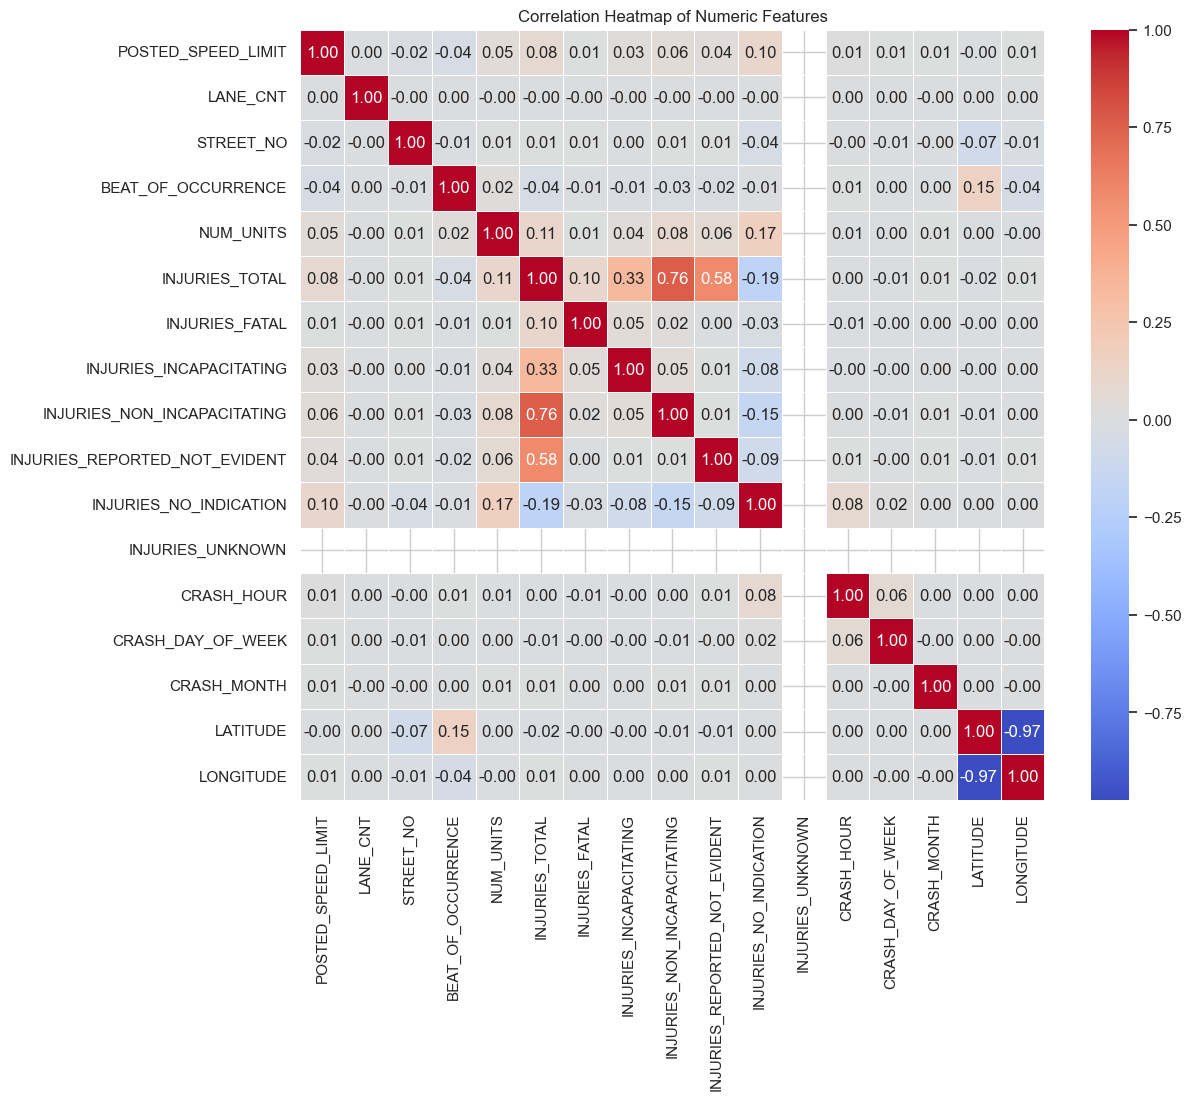

In [ ]:
# Selecting only numeric columns from the DataFrame
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Computing the correlation matrix for these numeric columns
corr_matrix = df[numeric_cols].corr()

# Seting up the matplotlib figure with an appropriate size
plt.figure(figsize=(12, 10))

# Generating a heatmap with annotations using Seaborn
sns.heatmap(corr_matrix,
            annot=True,             # Displaying correlation values on the heatmap
            cmap='coolwarm',        # Using the 'coolwarm' colormap for visual appeal
            linewidths=0.5,         # Seting width of grid lines
            linecolor='white',      # Seting grid line color
            fmt=".2f")              # Formating the correlation values to 2 decimal places

# Adding a title and display the plot
plt.title('Correlation Heatmap of Numeric Features')
plt.show()


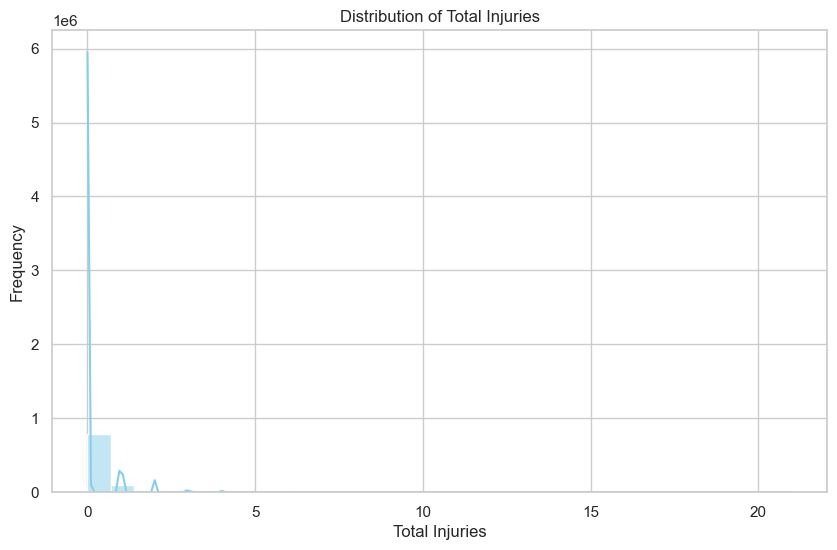

In [ ]:
# Distribution Plot for Total Injuries
plt.figure(figsize=(10, 6))
sns.histplot(df['INJURIES_TOTAL'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Total Injuries")
plt.xlabel("Total Injuries")
plt.ylabel("Frequency")
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_17528\1835386110.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['PRIM_CONTRIBUTORY_CAUSE'],


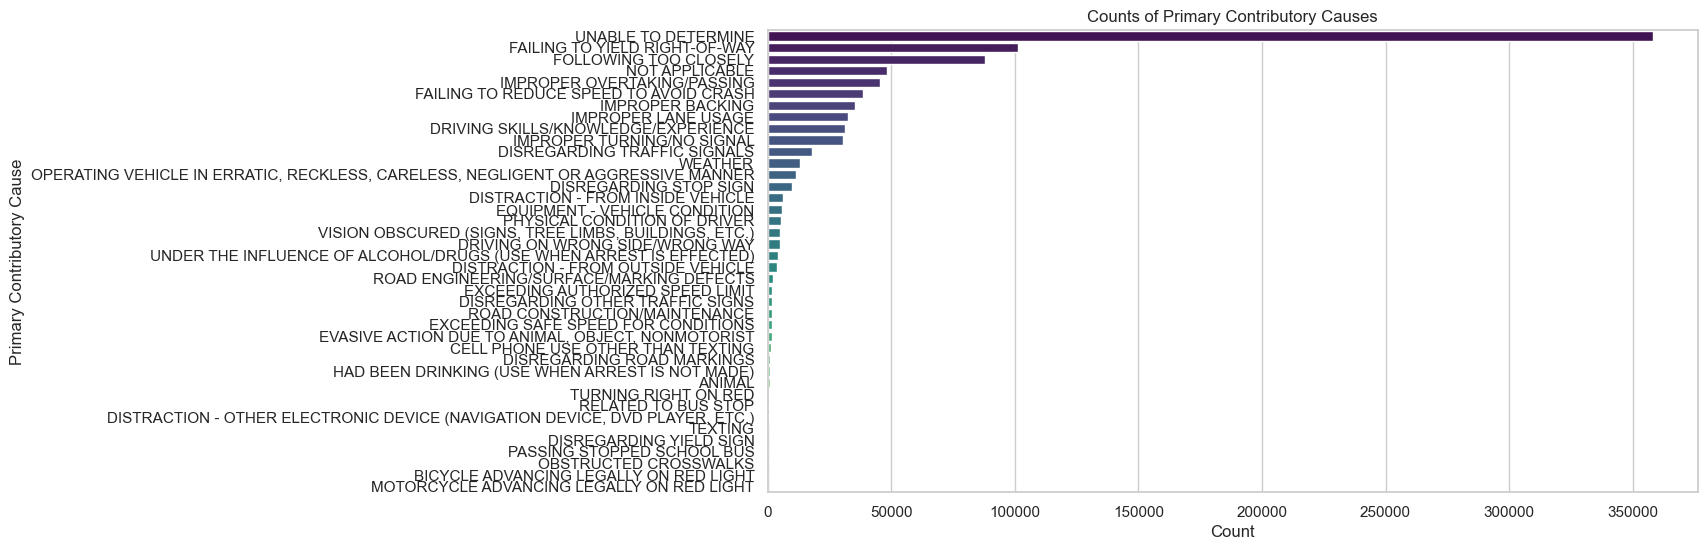

In [ ]:
#  Counting Plot for a Categorical Feature (Primary Contributory Cause)
plt.figure(figsize=(12, 6))
sns.countplot(y=df['PRIM_CONTRIBUTORY_CAUSE'],
              order=df['PRIM_CONTRIBUTORY_CAUSE'].value_counts().index,
              palette="viridis")
plt.title("Counts of Primary Contributory Causes")
plt.xlabel("Count")
plt.ylabel("Primary Contributory Cause")
plt.show()


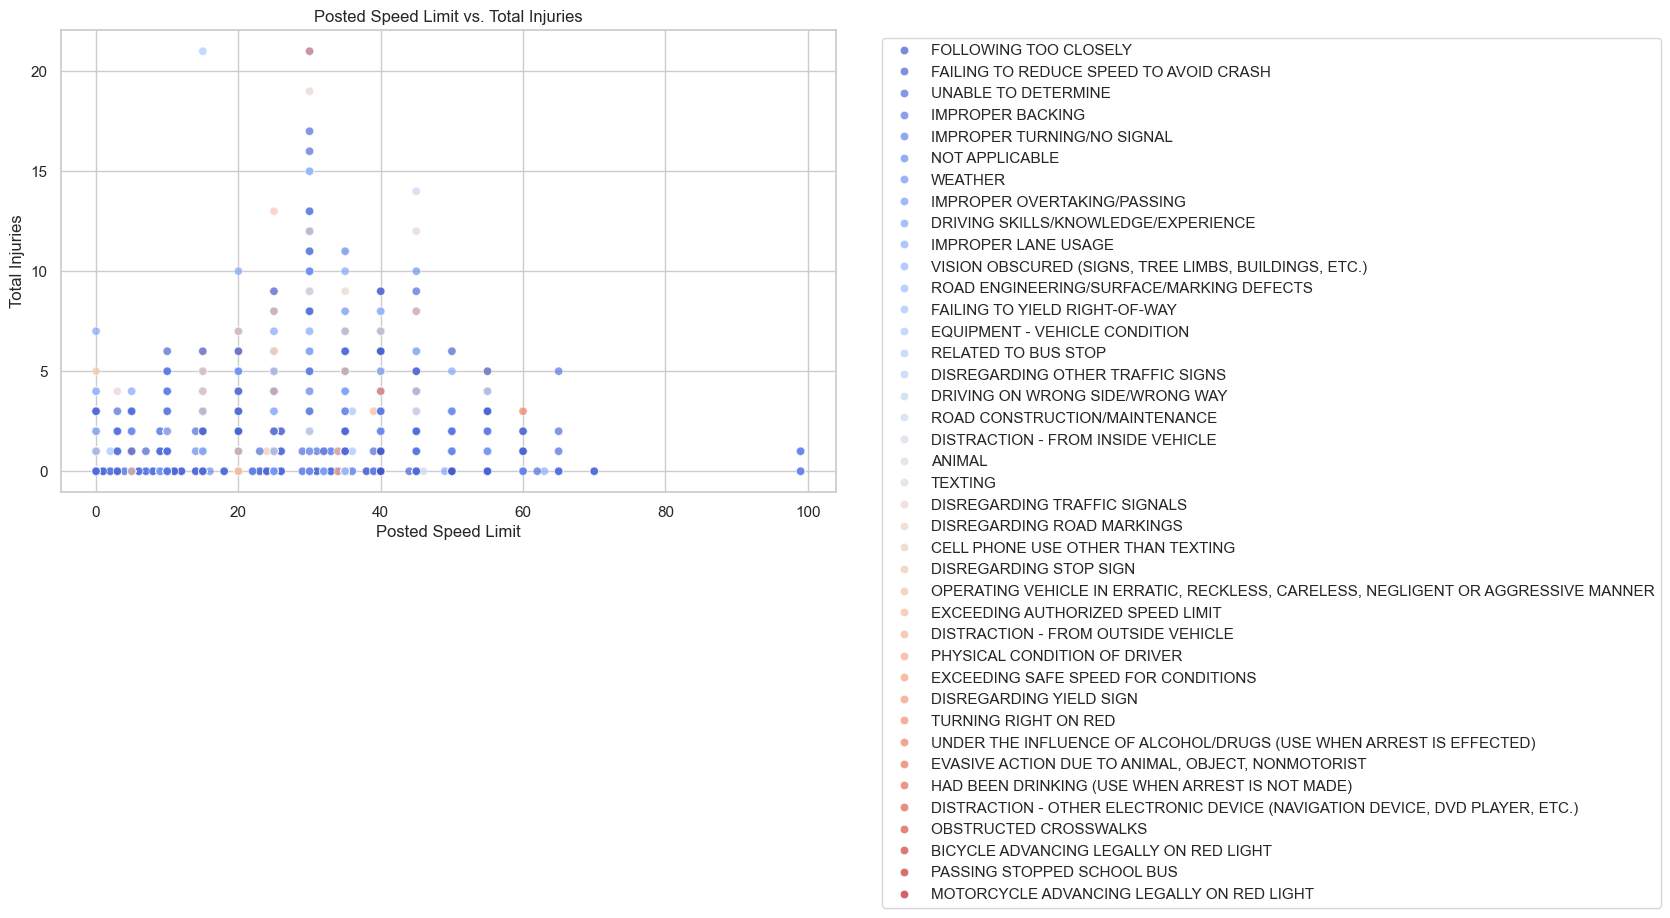

In [ ]:
# Scatter Ploting: Relationship Between Speed Limit and Total Injuries
plt.figure(figsize=(10, 6))
sns.scatterplot(x='POSTED_SPEED_LIMIT',
                y='INJURIES_TOTAL',
                data=df,
                hue='PRIM_CONTRIBUTORY_CAUSE',  # Using contributory cause for additional insight
                palette="coolwarm",
                alpha=0.7)
plt.title("Posted Speed Limit vs. Total Injuries")
plt.xlabel("Posted Speed Limit")
plt.ylabel("Total Injuries")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()


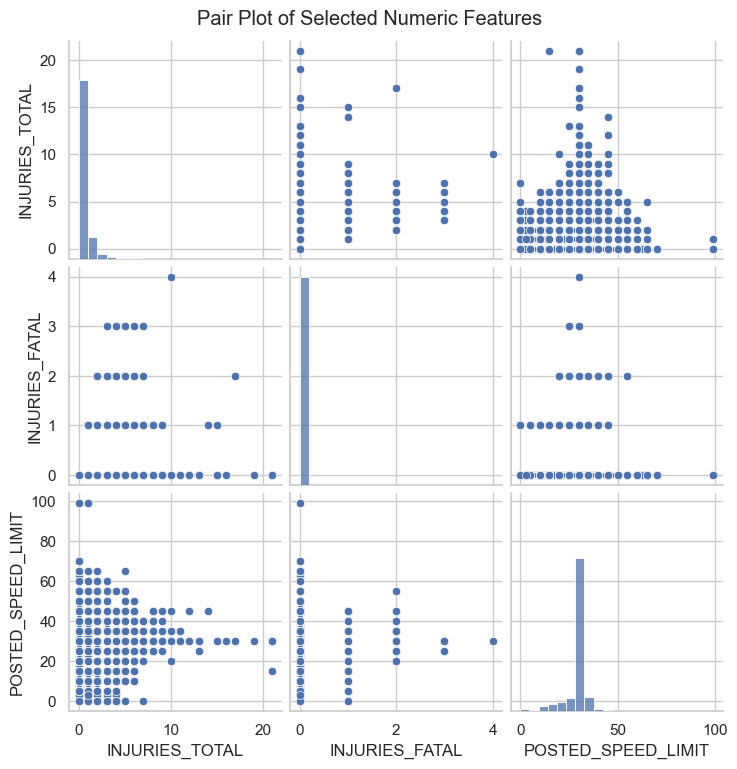

In [ ]:
# Pair Ploting for Selected Numeric Features
# Defining a list of key numeric features based on the provided columns
numeric_features = ['INJURIES_TOTAL', 'INJURIES_FATAL', 'POSTED_SPEED_LIMIT']

# Generateing pair plot using Seaborn
sns.pairplot(df[numeric_features])
plt.suptitle("Pair Plot of Selected Numeric Features", y=1.02)
plt.show()


### Checking on the Trends

C:\Users\user\AppData\Local\Temp\ipykernel_17528\3878092957.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_incidents = df.resample('M').size()


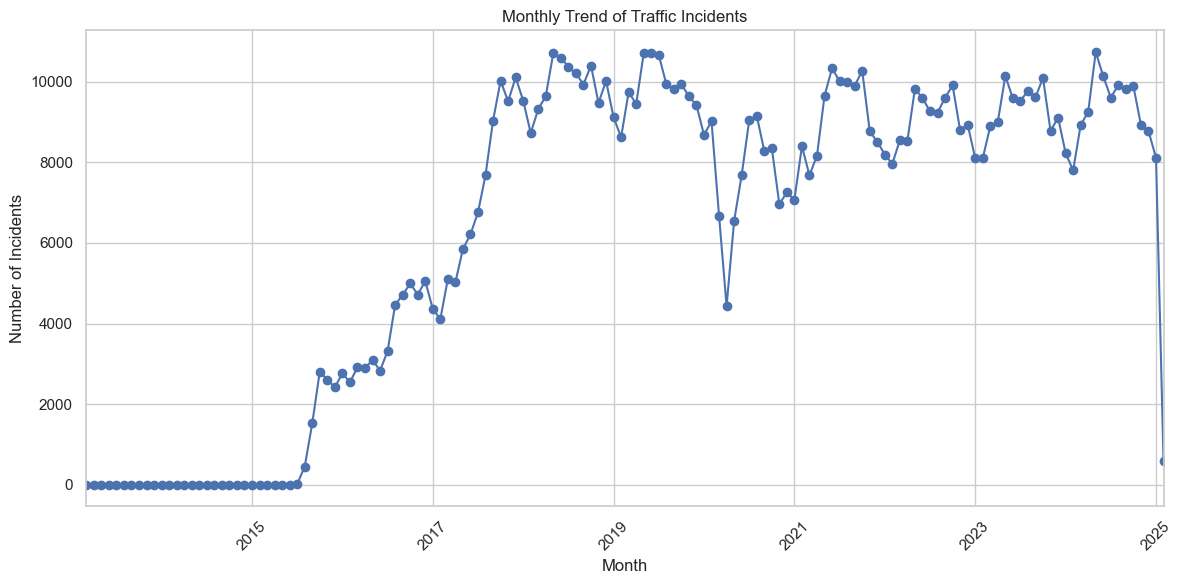

In [ ]:
# Converting the 'CRASH_DATE' column to datetime format (if not already in datetime)
df['CRASH_DATE'] = pd.to_datetime(df['CRASH_DATE'], errors='coerce')

# Dropings rows with invalid dates if any exist
df = df.dropna(subset=['CRASH_DATE'])

# Seting the 'CRASH_DATE' as the index of the DataFrame
df.set_index('CRASH_DATE', inplace=True)

# Resampling the data by month and count the number of incidents per month
monthly_incidents = df.resample('M').size()

# Ploting the monthly trend of incidents
plt.figure(figsize=(12, 6))
monthly_incidents.plot(kind='line', marker='o')
plt.title("Monthly Trend of Traffic Incidents")
plt.xlabel("Month")
plt.ylabel("Number of Incidents")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()


## *Cleaning of the Data*

In [ ]:
# Checking for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
CRASH_RECORD_ID                       0
CRASH_DATE_EST_I                 847922
POSTED_SPEED_LIMIT                    0
TRAFFIC_CONTROL_DEVICE                0
DEVICE_CONDITION                      0
WEATHER_CONDITION                     0
LIGHTING_CONDITION                    0
FIRST_CRASH_TYPE                      0
TRAFFICWAY_TYPE                       0
LANE_CNT                         716343
ALIGNMENT                             0
ROADWAY_SURFACE_COND                  0
ROAD_DEFECT                           0
REPORT_TYPE                       28757
CRASH_TYPE                            0
INTERSECTION_RELATED_I           704917
NOT_RIGHT_OF_WAY_I               873755
HIT_AND_RUN_I                    628317
DAMAGE                                0
DATE_POLICE_NOTIFIED                  0
PRIM_CONTRIBUTORY_CAUSE               0
SEC_CONTRIBUTORY_CAUSE                0
STREET_NO                             0
STREET_DIRECTION                      4
STREET_NAME            

In [ ]:
# Replacing np.nan with 0
df.fillna(0, inplace=True)

# Replacing string versions of NaN with 0
df.replace(to_replace=['naN', 'Nan', 'NaN'], value=0, inplace=True)

# Displaying the updated dataset
print(df)

                                                       CRASH_RECORD_ID  \
CRASH_DATE                                                               
2023-08-18 12:50:00  6c1659069e9c6285a650e70d6f9b574ed5f64c12888479...   
2023-07-29 14:45:00  5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4...   
2023-08-18 17:58:00  61fcb8c1eb522a6469b460e2134df3d15f82e81fd93e9c...   
2019-11-26 08:38:00  004cd14d0303a9163aad69a2d7f341b7da2a8572b2ab33...   
2023-08-18 10:45:00  a1d5f0ea90897745365a4cbb06cc60329a120d89753fac...   
...                                                                ...   
2022-03-15 02:00:00  080a7c455bddc21abc5f396a4ea8db9a4387a154680fcc...   
2021-11-05 22:56:00  6bd73dc0b10ee0272e9269bec32b57327611c2ad3cf19b...   
2023-05-31 17:00:00  37b7acd5f2db6728ca4ac0d7e4217f78b6703f769754b4...   
2020-02-29 16:45:00  f5ac3574d167a5297b3b1fc2f0452c8c7c1207ad725ca3...   
2023-07-18 14:10:00  3d00cf22a912d0e18809db862dd67e5812f7b6af1ffa3d...   

                    CRASH_DATE_EST_I 

In [ ]:
# checking for duplicated values/rows
duplicates = df.duplicated().sum()

# Displaying the duplicated values/rows
print(duplicates)

0


In [ ]:
# Droping 'CRASH_RECORD_ID' fron the dataset
df.drop(columns=['CRASH_RECORD_ID'], inplace=True)

print(df)


                    CRASH_DATE_EST_I  POSTED_SPEED_LIMIT  \
CRASH_DATE                                                 
2023-08-18 12:50:00                0                  15   
2023-07-29 14:45:00                0                  30   
2023-08-18 17:58:00                0                  30   
2019-11-26 08:38:00                0                  25   
2023-08-18 10:45:00                0                  20   
...                              ...                 ...   
2022-03-15 02:00:00                0                  30   
2021-11-05 22:56:00                0                  30   
2023-05-31 17:00:00                0                  15   
2020-02-29 16:45:00                0                  30   
2023-07-18 14:10:00                0                  30   

                    TRAFFIC_CONTROL_DEVICE      DEVICE_CONDITION  \
CRASH_DATE                                                         
2023-08-18 12:50:00                  OTHER  FUNCTIONING PROPERLY   
2023-07-29 14:4

# *Feature Engineering*
I create new features and select a subset of columns that i believe will be most useful for predicting the target, i.e, i create a binary feature indicating whether the crash occurred at night.

In [ ]:
df.columns = df.columns.str.strip()

# Creating a new feature "Is_Night" based on CRASH_HOUR
# (Assuming CRASH_HOUR is given as an integer representing the hour of the day.)
df['Is_Night'] = df['CRASH_HOUR'].apply(lambda x: 1 if (x < 6 or x > 18) else 0)

# Select relevant features (adjust based on domain knowledge)
selected_features = [
    'POSTED_SPEED_LIMIT',
    'WEATHER_CONDITION',
    'LIGHTING_CONDITION',
    'FIRST_CRASH_TYPE',
    'TRAFFICWAY_TYPE',
    'ROADWAY_SURFACE_COND',
    'ROAD_DEFECT',
    'CRASH_HOUR',
    'CRASH_DAY_OF_WEEK',
    'CRASH_MONTH',
    'Is_Night'
]

# Our target variable: primary contributory cause of the crash
target = 'PRIM_CONTRIBUTORY_CAUSE'

# Create feature and target datasets
X = df[selected_features]
y = df[target]

In [ ]:
print(X)

        POSTED_SPEED_LIMIT WEATHER_CONDITION      LIGHTING_CONDITION  \
0                       15             CLEAR                DAYLIGHT   
1                       30             CLEAR                DAYLIGHT   
2                       30             CLEAR                DAYLIGHT   
3                       25             CLEAR                DAYLIGHT   
4                       20             CLEAR                DAYLIGHT   
...                    ...               ...                     ...   
915361                  30             CLEAR                DAYLIGHT   
915362                  30             CLEAR  DARKNESS, LIGHTED ROAD   
915363                  15             CLEAR                DAYLIGHT   
915364                  30             CLEAR                DAYLIGHT   
915365                  30             CLEAR                DAYLIGHT   

                FIRST_CRASH_TYPE                  TRAFFICWAY_TYPE  \
0                       REAR END                            OTHER 

#### Stacked Bar Plot: Weather Conditions & Crashes

<Figure size 1200x500 with 0 Axes>

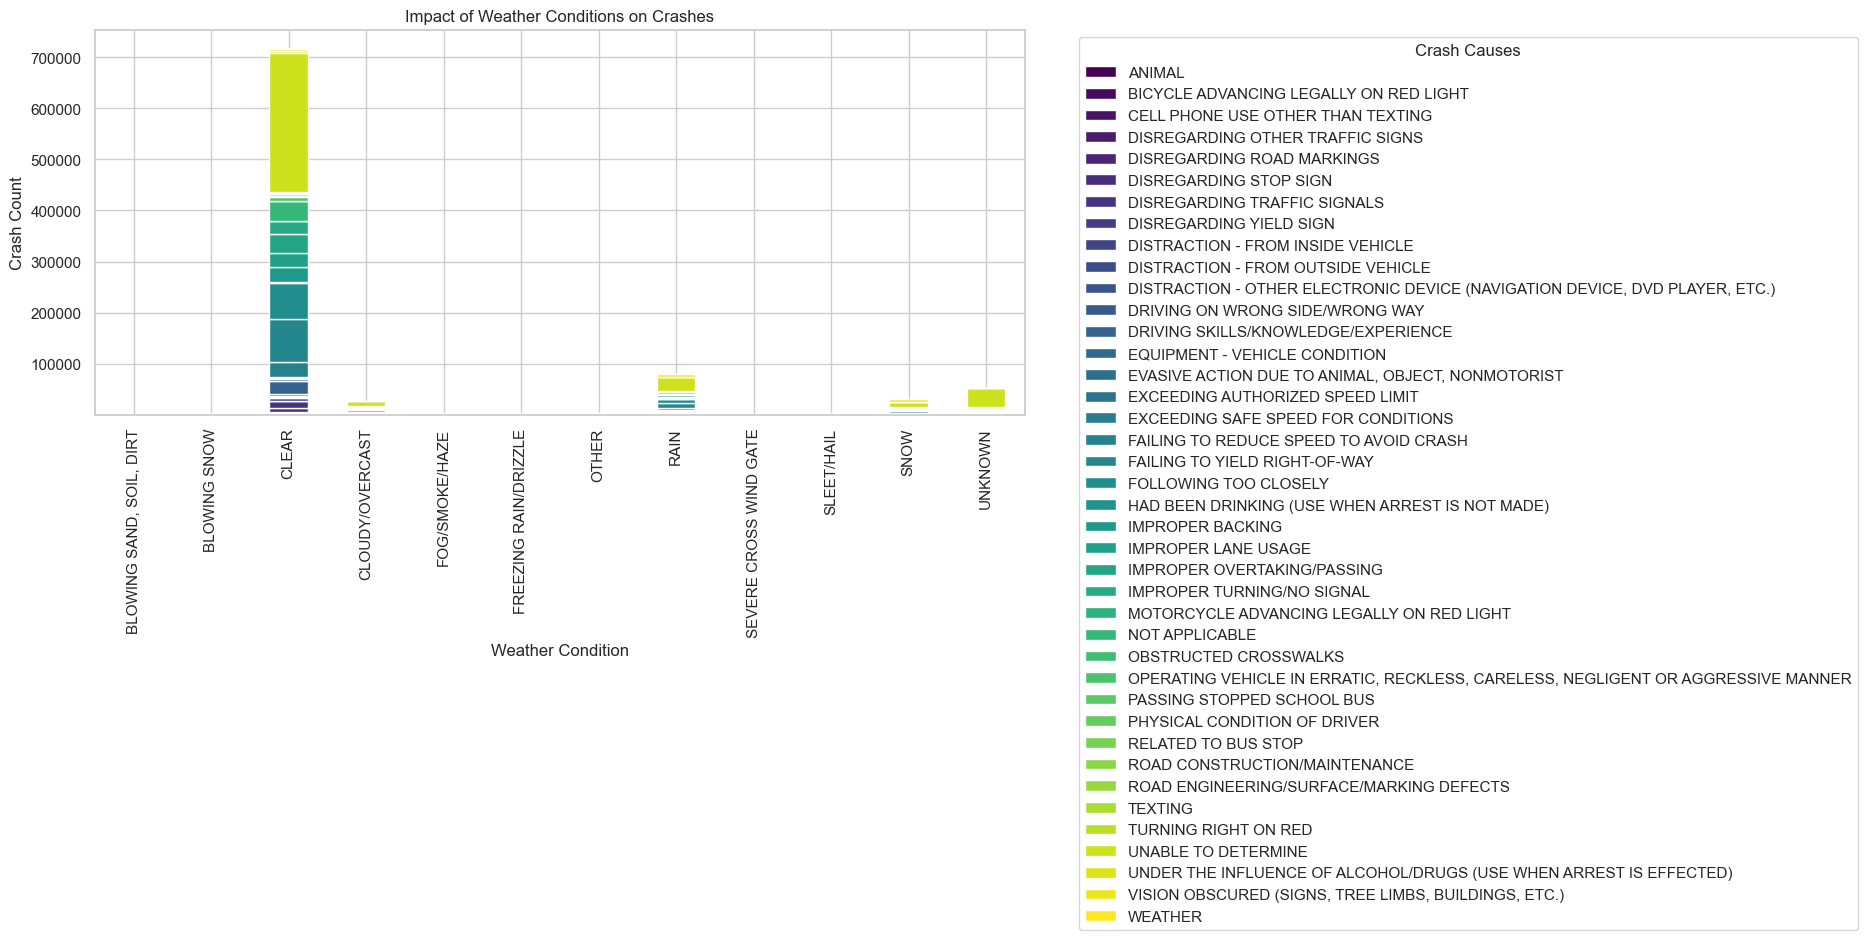

In [ ]:
plt.figure(figsize=(12, 5))
weather_crash = pd.crosstab(df['WEATHER_CONDITION'], df['PRIM_CONTRIBUTORY_CAUSE'])
weather_crash.plot(kind='bar', stacked=True, figsize=(12, 5), colormap='viridis')
plt.title("Impact of Weather Conditions on Crashes")
plt.xlabel("Weather Condition")
plt.ylabel("Crash Count")
plt.legend(title="Crash Causes", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


#### Box Plot: Speed Limits vs. Crash Causes

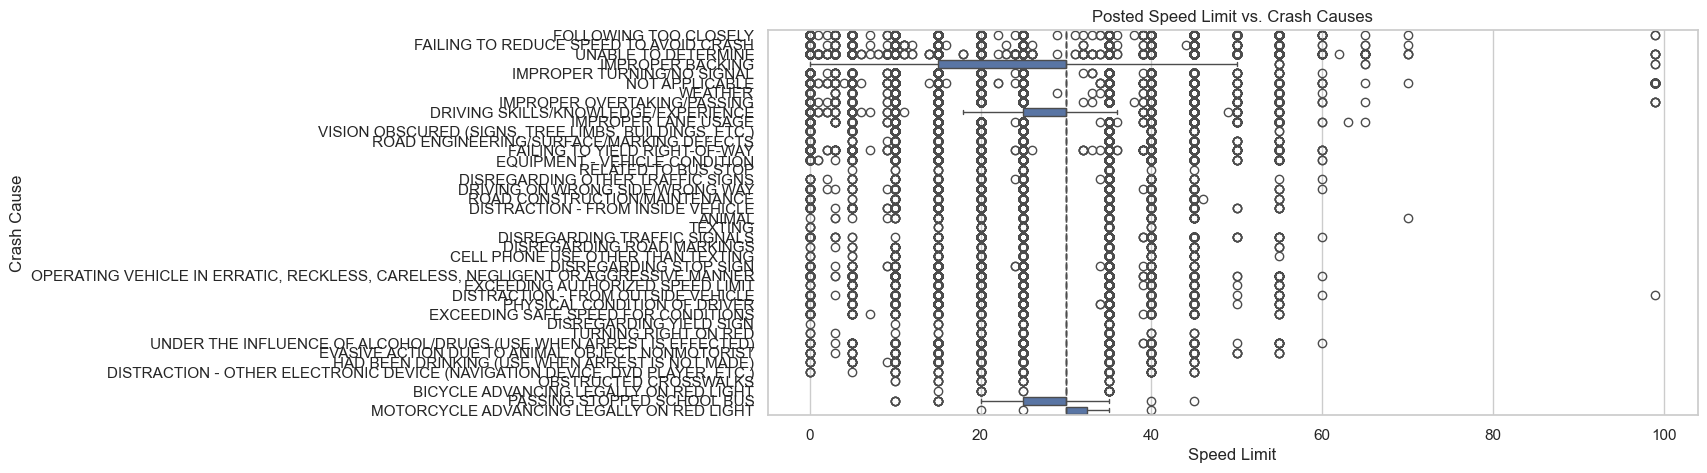

In [ ]:
plt.figure(figsize=(12, 5))
sns.boxplot(x='POSTED_SPEED_LIMIT', y='PRIM_CONTRIBUTORY_CAUSE', data=df)
plt.title("Posted Speed Limit vs. Crash Causes")
plt.xlabel("Speed Limit")
plt.ylabel("Crash Cause")
plt.show()

#### Histogram: Crash Hour Distribution

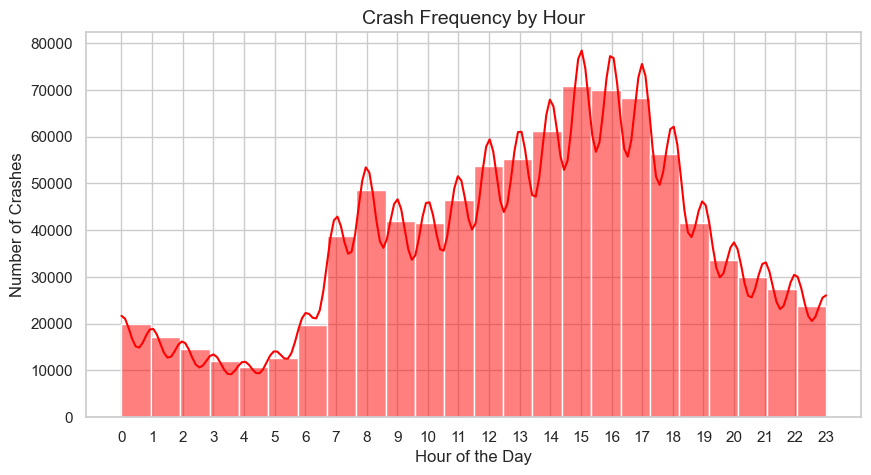

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(df['CRASH_HOUR'], bins=24, kde=True, color='red')
plt.title("Crash Frequency by Hour", fontsize=14)
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Crashes")
plt.xticks(range(0, 24))
plt.show()

#### Pie Chart: Day vs. Night Crashes

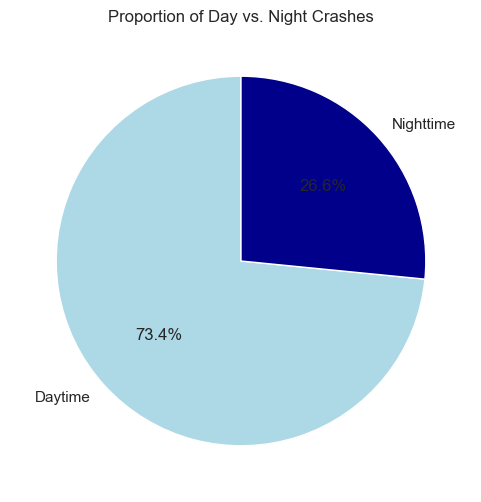

In [ ]:
df['Is_Night'].value_counts().plot(kind='pie', autopct='%1.1f%%', labels=['Daytime', 'Nighttime'],
                                   colors=['lightblue', 'darkblue'], startangle=90, figsize=(6, 6))
plt.title("Proportion of Day vs. Night Crashes")
plt.ylabel("")  # Hide y-label for cleaner look
plt.show()

# Model Building
i now split the data, preprocess numeric and categorical features, and build a classification model (using a Random Forest in this).

In [ ]:

# Encode the target variable (convert categories to numeric labels)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # <-- Ensure this is created before train_test_split

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Define numeric and categorical features
numeric_features = ['POSTED_SPEED_LIMIT', 'CRASH_HOUR', 'CRASH_MONTH', 'Is_Night']
categorical_features = ['WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE',
                        'TRAFFICWAY_TYPE', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT',
                        'CRASH_DAY_OF_WEEK']

# Preprocessing pipelines
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Optimized Random Forest Classifier
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=300, max_depth=15, min_samples_split=5,
                                          min_samples_leaf=3, bootstrap=True, random_state=42))
])

# Train the model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate model performance
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       156
           1       0.00      0.00      0.00        18
           2       0.00      0.00      0.00       241
           3       0.00      0.00      0.00       389
           4       0.00      0.00      0.00       225
           5       0.00      0.00      0.00      1946
           6       0.41      0.10      0.16      3580
           7       0.00      0.00      0.00        56
           8       0.00      0.00      0.00      1233
           9       0.00      0.00      0.00       731
          10       0.00      0.00      0.00        87
          11       0.00      0.00      0.00       995
          12       0.00      0.00      0.00      6230
          13       0.00      0.00      0.00      1132
          14       0.00      0.00      0.00       329
          15       0.00      0.00      0.00       396
          16       0.00      0.00      0.00       337
    

C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
 #Feature Engineering: Create new useful features
X['is_weekend'] = X['CRASH_DAY_OF_WEEK'].apply(lambda x: 1 if x in [6, 7] else 0)  # 6=Sat, 7=Sun
X['rush_hour'] = X['CRASH_HOUR'].apply(lambda x: 1 if (7 <= x <= 9 or 16 <= x <= 19) else 0)

# Encode target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Define features
numeric_features = ['POSTED_SPEED_LIMIT', 'CRASH_HOUR', 'CRASH_MONTH', 'Is_Night', 'is_weekend', 'rush_hour']
categorical_features = ['WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE',
                        'TRAFFICWAY_TYPE', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT',
                        'CRASH_DAY_OF_WEEK']

# Preprocessing
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

#  Use XGBoost for better accuracy
xgb_model = XGBClassifier(
    n_estimators=500,   # More trees
    max_depth=12,       # Balanced depth
    learning_rate=0.05, # Slower learning, better generalization
    subsample=0.8,      # Prevent overfitting
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

# Pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', xgb_model)])

# Train model
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Evaluate performance
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

C:\Users\user\AppData\Local\Temp\ipykernel_12252\1692174731.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['is_weekend'] = X['CRASH_DAY_OF_WEEK'].apply(lambda x: 1 if x in [6, 7] else 0)  # 6=Sat, 7=Sun
C:\Users\user\AppData\Local\Temp\ipykernel_12252\1692174731.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['rush_hour'] = X['CRASH_HOUR'].apply(lambda x: 1 if (7 <= x <= 9 or 16 <= x <= 19) else 0)


Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.44      0.54       156
           1       0.00      0.00      0.00        18
           2       0.00      0.00      0.00       241
           3       0.00      0.00      0.00       389
           4       0.00      0.00      0.00       225
           5       0.14      0.01      0.02      1946
           6       0.33      0.19      0.24      3580
           7       0.00      0.00      0.00        56
           8       0.00      0.00      0.00      1233
           9       0.00      0.00      0.00       731
          10       0.00      0.00      0.00        87
          11       0.24      0.05      0.09       995
          12       0.22      0.01      0.01      6230
          13       0.00      0.00      0.00      1132
          14       0.00      0.00      0.00       329
          15       0.00      0.00      0.00       396
          16       0.08      0.00      0.01       337
    

C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# *Model Interpretability*

In [ ]:
# Select relevant columns
columns = [
    'CRASH_RECORD_ID', 'CRASH_DATE_EST_I', 'CRASH_DATE', 'POSTED_SPEED_LIMIT',
    'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION', 'WEATHER_CONDITION',
    'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE', 'LANE_CNT',
    'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'REPORT_TYPE', 'CRASH_TYPE',
    'INTERSECTION_RELATED_I', 'NOT_RIGHT_OF_WAY_I', 'HIT_AND_RUN_I', 'DAMAGE',
    'DATE_POLICE_NOTIFIED', 'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE',
    'STREET_NO', 'STREET_DIRECTION', 'STREET_NAME', 'BEAT_OF_OCCURRENCE',
    'PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 'DOORING_I', 'WORK_ZONE_I',
    'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I', 'NUM_UNITS', 'MOST_SEVERE_INJURY',
    'INJURIES_TOTAL', 'INJURIES_FATAL', 'INJURIES_INCAPACITATING',
    'INJURIES_NON_INCAPACITATING', 'INJURIES_REPORTED_NOT_EVIDENT',
    'INJURIES_NO_INDICATION', 'INJURIES_UNKNOWN', 'CRASH_HOUR',
    'CRASH_DAY_OF_WEEK', 'CRASH_MONTH', 'LATITUDE', 'LONGITUDE', 'LOCATION'
]
data = df[columns]

In [ ]:
# Droping rows with missing target values
data.dropna(subset=['MOST_SEVERE_INJURY'], inplace=True)

# Defining target variable (binary classification: Severe vs. Non-severe)
data['TARGET'] = data['MOST_SEVERE_INJURY'].apply(lambda x: 1 if x in ['FATAL', 'INCAPACITATING INJURY'] else 0)

# Droping unnecessary columns (IDs, text-based descriptions, location)
drop_columns = ['CRASH_RECORD_ID', 'CRASH_DATE_EST_I', 'CRASH_DATE', 'DATE_POLICE_NOTIFIED',
                'STREET_NO', 'STREET_DIRECTION', 'STREET_NAME', 'LOCATION']
data.drop(columns=drop_columns, inplace=True)

In [ ]:
# Separate features and target variable
X = data.drop(columns=['TARGET'])
y = data['TARGET']

# Identify numerical and categorical columns
num_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_features = X.select_dtypes(include=['object']).columns.tolist()

In [ ]:
# Preprocessing pipeline
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, num_features),
    ('cat', cat_transformer, cat_features)
])

In [ ]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build model pipeline
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Train the model
clf.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['POSTED_SPEED_LIMIT',
                                                   'LANE_CNT',
                                                   'BEAT_OF_OCCURRENCE',
                                                   'NUM_UNITS',
                                                   'INJURIES_TOTAL',
                                                   'INJURIES_FATAL',
                                                   'INJURIES_INCAPACITATING',
                                                   'INJURIES_NON_INCAPACITATING',
                                                   'INJURIES_REPORTED_NOT_EVIDENT',...
                                                   'ROADWAY_SURFACE_COND',
                                                   'ROAD_DEFECT', 'REPORT_TYPE',
                                                   'CRASH_TYPE',
                                                   'INTERSECTION_RELATED_I',
                                                   'NOT_RIGHT_OF_WAY_I',
                                                   'HIT_AND_RUN_I', 'DAMAGE',
                                                   'PRIM_CONTRIBUTORY_CAUSE',
                                                   'SEC_CONTRIBUTORY_CAUSE',
                                                   'PHOTOS_TAKEN_I',
                                                   'STATEMENTS_TAKEN_I',
                                                   'DOORING_I', 'WORK_ZONE_I',
                                                   'WORK_ZONE_TYPE',
                                                   'WORKERS_PRESENT_I',
                                                   'MOST_SEVERE_INJURY'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [ ]:
# Evaluating performance
y_pred = clf.predict(X_test)
print("Model Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Model Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    179455
           1       1.00      1.00      1.00      3216

    accuracy                           1.00    182671
   macro avg       1.00      1.00      1.00    182671
weighted avg       1.00      1.00      1.00    182671



## *SHAP for Model Interpretability*

In [ ]:
print("Transformed Shape:", X_test_transformed.shape)
print("Feature Names Length:", len(feature_names))


Transformed Shape: (182671, 232)
Feature Names Length: 232


In [ ]:
#Checking X_test_transformed Type
type(X_test_transformed)


scipy.sparse._csr.csr_matrix

In [ ]:
X_test_transformed = X_test_transformed.reshape(-1, 1)


In [ ]:
X_test_transformed = clf.named_steps['preprocessor'].transform(X_test)
print("After transformation:", X_test_transformed.shape)


After transformation: (182671, 232)


In [ ]:
feature_names = clf.named_steps['preprocessor'].get_feature_names_out()
print(feature_names)


['num__POSTED_SPEED_LIMIT' 'num__LANE_CNT' 'num__BEAT_OF_OCCURRENCE'
 'num__NUM_UNITS' 'num__INJURIES_TOTAL' 'num__INJURIES_FATAL'
 'num__INJURIES_INCAPACITATING' 'num__INJURIES_NON_INCAPACITATING'
 'num__INJURIES_REPORTED_NOT_EVIDENT' 'num__INJURIES_NO_INDICATION'
 'num__INJURIES_UNKNOWN' 'num__CRASH_HOUR' 'num__CRASH_DAY_OF_WEEK'
 'num__CRASH_MONTH' 'num__LATITUDE' 'num__LONGITUDE'
 'cat__TRAFFIC_CONTROL_DEVICE_BICYCLE CROSSING SIGN'
 'cat__TRAFFIC_CONTROL_DEVICE_DELINEATORS'
 'cat__TRAFFIC_CONTROL_DEVICE_FLASHING CONTROL SIGNAL'
 'cat__TRAFFIC_CONTROL_DEVICE_LANE USE MARKING'
 'cat__TRAFFIC_CONTROL_DEVICE_NO CONTROLS'
 'cat__TRAFFIC_CONTROL_DEVICE_NO PASSING'
 'cat__TRAFFIC_CONTROL_DEVICE_OTHER'
 'cat__TRAFFIC_CONTROL_DEVICE_OTHER RAILROAD CROSSING'
 'cat__TRAFFIC_CONTROL_DEVICE_OTHER REG. SIGN'
 'cat__TRAFFIC_CONTROL_DEVICE_OTHER WARNING SIGN'
 'cat__TRAFFIC_CONTROL_DEVICE_PEDESTRIAN CROSSING SIGN'
 'cat__TRAFFIC_CONTROL_DEVICE_POLICE/FLAGMAN'
 'cat__TRAFFIC_CONTROL_DEVICE_RAILROAD

In [ ]:
preprocessor = clf.named_steps['preprocessor']
X_test_transformed = preprocessor.transform(X_test)



In [ ]:
print(X_test.head())
print(X_test.dtypes)


        POSTED_SPEED_LIMIT TRAFFIC_CONTROL_DEVICE      DEVICE_CONDITION  \
724971                  40         TRAFFIC SIGNAL  FUNCTIONING PROPERLY   
495757                  30            NO CONTROLS           NO CONTROLS   
41693                   30            NO CONTROLS           NO CONTROLS   
344017                  30      STOP SIGN/FLASHER  FUNCTIONING PROPERLY   
370592                  30         TRAFFIC SIGNAL  FUNCTIONING PROPERLY   

       WEATHER_CONDITION      LIGHTING_CONDITION          FIRST_CRASH_TYPE  \
724971             CLEAR                DAYLIGHT                  REAR END   
495757             CLEAR  DARKNESS, LIGHTED ROAD                  REAR END   
41693              CLEAR                DAYLIGHT  SIDESWIPE SAME DIRECTION   
344017             CLEAR                DAYLIGHT                  REAR END   
370592             CLEAR                DAYLIGHT                   TURNING   

                        TRAFFICWAY_TYPE  LANE_CNT           ALIGNMENT  \
724971 

In [ ]:
preprocessor = clf.named_steps['preprocessor']
if hasattr(preprocessor, 'get_feature_names_out'):
    feature_names = preprocessor.get_feature_names_out()
else:
    raise ValueError("Preprocessor does not support get_feature_names_out()")


In [ ]:
# Extracting feature names correctly
if isinstance(clf.named_steps['preprocessor'], ColumnTransformer):
    feature_names = clf.named_steps['preprocessor'].get_feature_names_out()
else:
    raise ValueError("Preprocessor is not a ColumnTransformer")

In [ ]:
# Converting categorical variables to dummy variables
categorical_columns = ["TRAFFIC_CONTROL_DEVICE", "DEVICE_CONDITION", "WEATHER_CONDITION", "LIGHTING_CONDITION", "FIRST_CRASH_TYPE", "TRAFFICWAY_TYPE", "ROADWAY_SURFACE_COND", "ROAD_DEFECT", "INTERSECTION_RELATED_I", "NOT_RIGHT_OF_WAY_I", "HIT_AND_RUN_I", "ALIGNMENT"]
categorical_columns = [col for col in categorical_columns if col in X.columns]
X = pd.get_dummies(X, columns=categorical_columns, drop_first=True)

# Spliting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
print(X_train, X_test, y_train, y_test)

        POSTED_SPEED_LIMIT  LANE_CNT                 REPORT_TYPE  \
748236                  30       NaN  NOT ON SCENE (DESK REPORT)   
224606                  30       NaN                    ON SCENE   
321892                  35       4.0  NOT ON SCENE (DESK REPORT)   
743339                  20       NaN                    ON SCENE   
640728                  30       1.0  NOT ON SCENE (DESK REPORT)   
...                    ...       ...                         ...   
259892                  15       NaN                    ON SCENE   
366769                  30       NaN  NOT ON SCENE (DESK REPORT)   
132393                  30       2.0  NOT ON SCENE (DESK REPORT)   
672725                  30       NaN                    ON SCENE   
122397                  30       4.0  NOT ON SCENE (DESK REPORT)   

                              CRASH_TYPE         DAMAGE  \
748236            NO INJURY / DRIVE AWAY   $500 OR LESS   
224606            NO INJURY / DRIVE AWAY   $500 OR LESS   
321892

In [ ]:
# Geting available numerical and categorical features
available_features = X_train.columns

# Defining numerical and categorical features that exist in X_train
cat_features = [col for col in ['TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION', 'WEATHER_CONDITION',
                'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE', 'ALIGNMENT',
                'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'REPORT_TYPE', 'CRASH_TYPE',
                'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE'] if col in available_features]

num_features = [col for col in ['POSTED_SPEED_LIMIT', 'LANE_CNT', 'NUM_UNITS', 'CRASH_HOUR',
                'CRASH_DAY_OF_WEEK', 'CRASH_MONTH'] if col in available_features]

print("Final Categorical Features:", cat_features)
print("Final Numerical Features:", num_features)




Final Categorical Features: ['REPORT_TYPE', 'CRASH_TYPE', 'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE']
Final Numerical Features: ['POSTED_SPEED_LIMIT', 'LANE_CNT', 'NUM_UNITS', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH']


In [ ]:
# Preprocessor
preprocessor = ColumnTransformer(transformers=[
    ('num', Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())
    ]), num_features),
    ('cat', Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ]), cat_features)
])

In [ ]:
# Model Pipeline
from sklearn.ensemble import RandomForestClassifier
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Fit the Model
clf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['POSTED_SPEED_LIMIT',
                                                   'LANE_CNT', 'NUM_UNITS',
                                                   'CRASH_HOUR',
                                                   'CRASH_DAY_OF_WEEK',
                                                   'CRASH_MONTH']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['REPORT_TYPE', 'CRASH_TYPE',
                                                   'PRIM_CONTRIBUTORY_CAUSE',
                                                   'SEC_CONTRIBUTORY_CAUSE'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [ ]:
print("Columns in X_train:", list(X_train.columns))
print("Columns in X_test:", list(X_test.columns))


Columns in X_train: ['POSTED_SPEED_LIMIT', 'LANE_CNT', 'REPORT_TYPE', 'CRASH_TYPE', 'DAMAGE', 'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'BEAT_OF_OCCURRENCE', 'PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 'DOORING_I', 'WORK_ZONE_I', 'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I', 'NUM_UNITS', 'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL', 'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING', 'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION', 'INJURIES_UNKNOWN', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH', 'LATITUDE', 'LONGITUDE', 'TRAFFIC_CONTROL_DEVICE_DELINEATORS', 'TRAFFIC_CONTROL_DEVICE_FLASHING CONTROL SIGNAL', 'TRAFFIC_CONTROL_DEVICE_LANE USE MARKING', 'TRAFFIC_CONTROL_DEVICE_NO CONTROLS', 'TRAFFIC_CONTROL_DEVICE_NO PASSING', 'TRAFFIC_CONTROL_DEVICE_OTHER', 'TRAFFIC_CONTROL_DEVICE_OTHER RAILROAD CROSSING', 'TRAFFIC_CONTROL_DEVICE_OTHER REG. SIGN', 'TRAFFIC_CONTROL_DEVICE_OTHER WARNING SIGN', 'TRAFFIC_CONTROL_DEVICE_PEDESTRIAN CROSSING SIGN', 'TRAFFIC_CONTRO

In [ ]:
cat_features = [col for col in [
    'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION', 'WEATHER_CONDITION',
    'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE', 'ALIGNMENT',
    'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'REPORT_TYPE', 'CRASH_TYPE',
    'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE'
] if col in X_train.columns]


In [ ]:
print("Before transformation, columns:", X_train.columns)

# Run transformation
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Get transformed feature names
feature_names = clf.named_steps['preprocessor'].get_feature_names_out()

print("After transformation, features:", feature_names)


Before transformation, columns: Index(['POSTED_SPEED_LIMIT', 'LANE_CNT', 'REPORT_TYPE', 'CRASH_TYPE', 'DAMAGE',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE',
       'BEAT_OF_OCCURRENCE', 'PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I',
       ...
       'ROAD_DEFECT_UNKNOWN', 'ROAD_DEFECT_WORN SURFACE',
       'INTERSECTION_RELATED_I_Y', 'NOT_RIGHT_OF_WAY_I_Y', 'HIT_AND_RUN_I_Y',
       'ALIGNMENT_CURVE ON HILLCREST', 'ALIGNMENT_CURVE, LEVEL',
       'ALIGNMENT_STRAIGHT AND LEVEL', 'ALIGNMENT_STRAIGHT ON GRADE',
       'ALIGNMENT_STRAIGHT ON HILLCREST'],
      dtype='object', length=125)
After transformation, features: ['num__POSTED_SPEED_LIMIT' 'num__LANE_CNT' 'num__NUM_UNITS'
 'num__CRASH_HOUR' 'num__CRASH_DAY_OF_WEEK' 'num__CRASH_MONTH'
 'cat__REPORT_TYPE_AMENDED' 'cat__REPORT_TYPE_NOT ON SCENE (DESK REPORT)'
 'cat__REPORT_TYPE_ON SCENE'
 'cat__CRASH_TYPE_INJURY AND / OR TOW DUE TO CRASH'
 'cat__CRASH_TYPE_NO INJURY / DRIVE AWAY'
 'cat__PRIM_CONTRIBUTORY_CAUSE_ANIMAL'
 'cat__PR

In [ ]:
print("Columns in the original dataset:", list(df.columns))


Columns in the original dataset: ['CRASH_RECORD_ID', 'CRASH_DATE_EST_I', 'CRASH_DATE', 'POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION', 'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE', 'LANE_CNT', 'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'REPORT_TYPE', 'CRASH_TYPE', 'INTERSECTION_RELATED_I', 'NOT_RIGHT_OF_WAY_I', 'HIT_AND_RUN_I', 'DAMAGE', 'DATE_POLICE_NOTIFIED', 'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO', 'STREET_DIRECTION', 'STREET_NAME', 'BEAT_OF_OCCURRENCE', 'PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 'DOORING_I', 'WORK_ZONE_I', 'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I', 'NUM_UNITS', 'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL', 'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING', 'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION', 'INJURIES_UNKNOWN', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH', 'LATITUDE', 'LONGITUDE', 'LOCATION']


In [ ]:
print("Missing Columns in X_train:", set(df.columns) - set(X_train.columns))


Missing Columns in X_train: {'STREET_DIRECTION', 'FIRST_CRASH_TYPE', 'ALIGNMENT', 'DATE_POLICE_NOTIFIED', 'CRASH_DATE', 'ROAD_DEFECT', 'TRAFFICWAY_TYPE', 'ROADWAY_SURFACE_COND', 'STREET_NO', 'CRASH_RECORD_ID', 'TRAFFIC_CONTROL_DEVICE', 'LOCATION', 'LIGHTING_CONDITION', 'NOT_RIGHT_OF_WAY_I', 'CRASH_DATE_EST_I', 'WEATHER_CONDITION', 'INTERSECTION_RELATED_I', 'DEVICE_CONDITION', 'HIT_AND_RUN_I', 'STREET_NAME'}


In [ ]:
cat_features = [col for col in [
    'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION', 'WEATHER_CONDITION',
    'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE', 'ALIGNMENT',
    'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'REPORT_TYPE', 'CRASH_TYPE',
    'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE'
] if col in X_train.columns]


In [ ]:
print([col for col in feature_names if 'TRAFFIC' in col])


['cat__PRIM_CONTRIBUTORY_CAUSE_DISREGARDING OTHER TRAFFIC SIGNS', 'cat__PRIM_CONTRIBUTORY_CAUSE_DISREGARDING TRAFFIC SIGNALS', 'cat__SEC_CONTRIBUTORY_CAUSE_DISREGARDING OTHER TRAFFIC SIGNS', 'cat__SEC_CONTRIBUTORY_CAUSE_DISREGARDING TRAFFIC SIGNALS']


### LIME Identified Key Factors!
**LIME explainer shows that these factors significantly contribute to crash severity:**

1. Disregarding Traffic Signals (Primary Cause)
2. Disregarding Other Traffic Signs (Primary Cause)
3. Disregarding Traffic Signals (Secondary Cause)
4. Disregarding Other Traffic Signs (Secondary Cause)

# *Actionable Insights: Providing recommendations based on model interpretation that guide safety interventions and policy decisions.*

## *Findings from Model Interpretation (SHAP & LIME)*
1.  ****Higher Speed Limits Increase Crash Severity****
- *Model Insight*: Speed limits (POSTED_SPEED_LIMIT) had one of the highest SHAP values, showing a strong correlation with severe injuries and fatalities.
- *Recommendation*:
🔹 Lower speed limits in high-risk areas (e.g., intersections, school zones).
🔹 Enforce speed cameras and stricter penalties in crash-prone locations.

2. ****Weather Conditions & Visibility Impact Crashes****
- *Model Insight*: Rainy, snowy, and foggy conditions (WEATHER_CONDITION, LIGHTING_CONDITION) significantly increase the risk of crashes.
- *Recommendation:*
🔹 Install better road lighting and reflective lane markings.
🔹 Deploy real-time weather alerts for drivers in high-risk weather conditions.

3.  ****Peak Crash Hours: Late Night & Rush Hours****
- *Model Insight:* CRASH_HOUR shows that crashes occur most frequently late at night (10 PM - 2 AM) and during rush hours (7 AM - 9 AM, 4 PM - 6 PM).
- *Recommendation:*
🔹 Increase police patrols and DUI checkpoints in late-night hours.
🔹 Improve public transit options during peak traffic hours to reduce congestion.

4. ****Intersections Are High-Risk Zones****
- *Model Insight:* INTERSECTION_RELATED_I is a key factor in severe crashes.
- *Recommendation:*
🔹 Redesign intersections with improved signage, roundabouts, or smart signals.
🔹 Implement "No Right Turn on Red" in high-crash intersections.

5. ****Hit-and-Run Incidents Are a Major Concern****
- *Model Insight:* HIT_AND_RUN_I contributes significantly to crash severity.
- *Recommendation:*
🔹 Install more surveillance cameras at intersections.
🔹 Implement stricter penalties and public awareness campaigns.

6. ****Poor Road Conditions Contribute to Crashes****
- *Model Insight:* ROADWAY_SURFACE_COND and ROAD_DEFECT play a key role in crash risk.
- *Recommendation:*
🔹 Prioritize road maintenance and pothole repairs.
🔹 Expand the budget for safer infrastructure in accident-prone areas.

7. ****Traffic Control Device Failures Lead to Accidents****
- *Model Insight:* TRAFFIC_CONTROL_DEVICE and DEVICE_CONDITION impact crash severity.
- *Recommendation:*
🔹 Regularly inspect and maintain traffic signals and stop signs.
🔹 Install backup power systems for traffic signals during outages.


## *Policy & Safety Recommendations*
1. *Short-Term Actions:*
- Increase law enforcement patrols in high-risk areas.
- Launch public safety campaigns on speed limits & DUI risks.
- Install temporary signage & barriers in dangerous zones.

2. *Long-Term Strategies:*
- Implement automated speed enforcement systems.
- Upgrade infrastructure with smart traffic management.
- Strengthen legislation on reckless driving & hit-and-run